# Programming Assignment: Центральная предельная теорема
В этом задании вам предстоит проверить работу центральной предельной теоремы, а также поработать с генерацией случайных чисел и построением графиков в Питоне. 

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pylab as plt
from scipy.stats import erlang 
import scipy.stats as sts

%matplotlib inline

# Task №1
Выберите ваше любимое непрерывное распределение (чем меньше оно будет похоже на нормальное, тем интереснее; попробуйте выбрать какое-нибудь распределение из тех, что мы не обсуждали в курсе). Сгенерируйте из него выборку объёма 1000.

*Было выбрано [распределение Эрланга](https://ru.wikipedia.org/wiki/%D0%93%D0%B0%D0%BC%D0%BC%D0%B0-%D1%80%D0%B0%D1%81%D0%BF%D1%80%D0%B5%D0%B4%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5) - частный случай гамма-распределения*


In [2]:
k = 3.0
xm = 1.5
x = np.linspace(0,20,1000)

In [3]:
#генерируем выборку
erlangDistribution = erlang(k, loc=0, scale=xm)
erlangRvs = erlangDistribution.rvs(1000)

In [4]:
def metrics(erlangDistribution):
    print(f"Mean={erlangDistribution.mean()}")
    print(f"Median={round(erlangDistribution.median(),2)}")
    print(f"Deviation={round(erlangDistribution.std(),2)}")
    print(f"Variance={erlangDistribution.var()}")

In [5]:
metrics(erlangDistribution)

Mean=4.5
Median=4.01
Deviation=2.6
Variance=6.75


# Task 2
Постройте гистограмму выборки и нарисуйте поверх неё теоретическую плотность распределения вашей случайной величины (чтобы величины были в одном масштабе, не забудьте выставить у гистограммы значение параметра normed=True).

In [6]:
def plot_distribution(erlangRvs, x, title='Erlang probability distribution function'):
    plt.hist(erlangRvs, bins=30, density=True, label='Erlang pdf')

    pdf = erlangDistribution.pdf(x)
    plt.plot(x, pdf, label='Theoretical pdf')
    plt.legend()
    plt.title(title)
    return plt

<module 'matplotlib.pylab' from 'D:\\apps\\Anaconda3\\lib\\site-packages\\matplotlib\\pylab.py'>

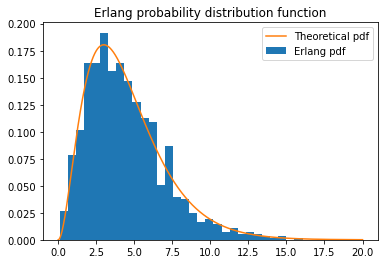

In [7]:
plot_distribution(erlangRvs, x)

# Task №3
Ваша задача — оценить распределение выборочного среднего вашей случайной величины при разных объёмах выборок. Для этого при трёх и более значениях n (например, 5, 10, 50) сгенерируйте 1000 выборок объёма n и постройте гистограммы распределений их выборочных средних.  
Поверх каждой гистограммы нарисуйте плотность соответствующего нормального распределения (будьте внимательны с параметрами функции, она принимает на вход не дисперсию, а стандартное отклонение).

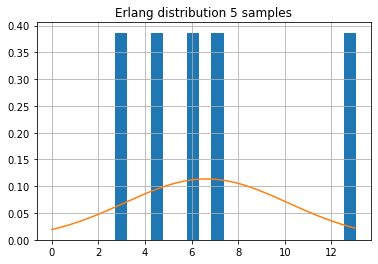

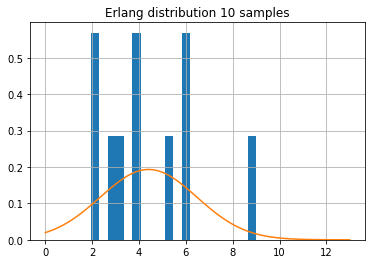

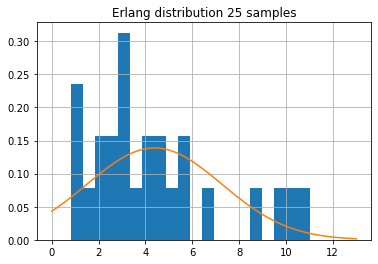

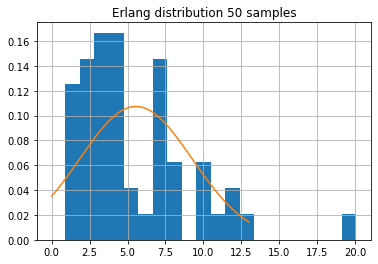

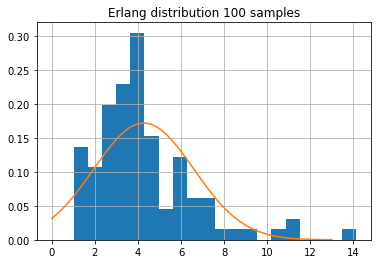

In [8]:
n_list = [5, 10, 25, 50, 100]
samples_num = 1000
Distributions = np.zeros(())

for n in n_list:
    for samples in range(samples_num):
        rvs = erlangDistribution.rvs(size=n)
        #print(rvs)
    title = 'Erlang distribution ' + str(n) + ' samples' 
    plt.hist(rvs, bins=20, density=True, label='Erlang pdf')
    plt.grid()
    plt.title(title)

    rvs = np.array(rvs)
    normRv = sts.norm(loc=np.mean(rvs), scale=np.std(rvs)) 
    x = np.linspace(0,13,1000)
    pdf = normRv.pdf(x)
    plt.plot(x, pdf)
    plt.show()

# Task №4

Используя информацию о среднем и дисперсии исходного распределения (её можно без труда найти в википедии), посчитайте значения параметров нормальных распределений, которыми, согласно центральной предельной теореме, приближается распределение выборочных средних.   
Обратите внимание: для подсчёта значений этих параметров нужно использовать именно теоретические среднее и дисперсию вашей случайной величины, а не их выборочные оценки. 

*Согласно формулам по ссылке выше, посчитаем математическое ожидание и дисперсию. Сравним их с полученными на выборке значениями*

In [9]:
mean = k * xm
var = k * np.power(xm,2)
print(f"theoretica: mean {mean}, var {var}")
print("empirical")
metrics(erlangDistribution)

theoretica: mean 4.5, var 6.75
empirical
Mean=4.5
Median=4.01
Deviation=2.6
Variance=6.75


# Task №5
Опишите разницу между полученными распределениями при различных значениях n. Как меняется точность аппроксимации распределения выборочных средних нормальным с ростом n?

*Для небольших n распрделение Эралнга плохо приближается нормальным, но при увеличении n (75 и 100) распределение стремиться к нормальному.  
Теоретические и полученные на данных значения дисперсии и м.о. совпали.*